Predicted values for training data: [ 4843.77956  -1070.690966 -1075.548162 ... -1506.931429  4423.663116
 -2882.714203]
Mean Squared Error for training data: 116054.8004895628


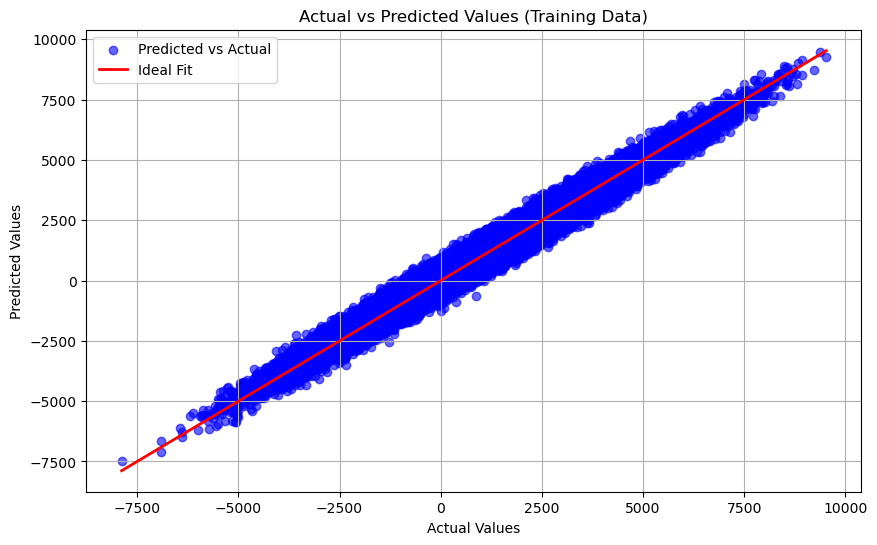

Predicted values for test data: [1067.956663 4496.891004 4051.356073 ... 4959.660076 -263.695475
  534.021819]


In [33]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression class
class LinearRegression():
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for _ in range(self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = -(2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X.dot(self.W) + self.b

# Feature scaling function
def scale_features(X, mean=None, std=None):
    if mean is None or std is None:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

# Function to calculate Mean Squared Error
def mean_squared_error(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

# Driver code
def main():
    # Importing training dataset
    df_train = pd.read_csv("linear_regression_train.csv")
    X_train = df_train.iloc[:, 1:-1].values  # Features for training
    Y_train = df_train.iloc[:, -1].values   # Target for training

    # Importing testing dataset (without target values)
    df_test = pd.read_csv("linear_regression_test.csv")
    X_test = df_test.iloc[:, 1:].values  # Features for testing (no target column)

    # Ensure feature dimensions are consistent
    if X_train.shape[1] != X_test.shape[1]:
        max_features = max(X_train.shape[1], X_test.shape[1])
        X_train = np.hstack([X_train, np.zeros((X_train.shape[0], max_features - X_train.shape[1]))])
        X_test = np.hstack([X_test, np.zeros((X_test.shape[0], max_features - X_test.shape[1]))])

    # Check for invalid values in data
    if np.any(np.isnan(X_train)) or np.any(np.isnan(Y_train)):
        raise ValueError("Training data contains NaN values.")
    if np.any(np.isinf(X_train)) or np.any(np.isinf(Y_train)):
        raise ValueError("Training data contains Inf values.")

    # Apply feature scaling
    X_train, mean, std = scale_features(X_train)
    X_test, _, _ = scale_features(X_test, mean, std)

    # Model training
    model = LinearRegression(iterations=1000, learning_rate=0.01)
    model.fit(X_train, Y_train)

    # Prediction on training data
    Y_train_pred = model.predict(X_train)

    # Calculate Mean Squared Error for training data
    mse_train = mean_squared_error(Y_train, Y_train_pred)

    # Output predicted values and MSE for training data
    print("Predicted values for training data:", np.round(Y_train_pred, 6))
    print("Mean Squared Error for training data:", mse_train)

    # Plot actual vs predicted values for training data
    plt.figure(figsize=(10, 6))
    plt.scatter(Y_train, Y_train_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
    plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color="red", linewidth=2, label="Ideal Fit")
    plt.title("Actual vs Predicted Values (Training Data)")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Prediction on test set
    Y_pred = model.predict(X_test)

    # Output predicted values for the test set
    print("Predicted values for test data:", np.round(Y_pred, 6))

if __name__ == "__main__":
    main()
